In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

Import the us stocks dataset (__us_stocks.csv__) and select the Adjusted Close (__Adj Close__) for all six stocks from __31-12-2015__ (incl.) until __31-12-2018__ (incl.). Save the DataFrame in the variable __stocks__ and work through the next questions with this DataFrame!

In [2]:
stocks = pd.read_csv('us_stocks.csv',header=[0,1], index_col=[0], parse_dates=[0])

In [3]:
stocks = stocks.loc['2015-12-31':'2018-12-31']

In [4]:
close = stocks['Adj Close'].copy()

In [5]:
close

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,65.910294,104.660004,31.437597,108.968636,71.450706,56.722713
2016-01-04,64.052849,102.220001,31.017828,108.452126,70.514938,56.870766
2016-01-05,63.067310,102.730003,30.871820,109.946350,70.739891,58.221748
2016-01-06,61.315948,102.970001,30.187403,109.208458,70.056053,58.804699
2016-01-07,60.763893,97.919998,29.055828,106.681190,69.444221,60.174198
...,...,...,...,...,...,...
2018-12-21,90.957733,124.949997,44.557564,174.149994,90.256142,87.129997
2018-12-24,89.135193,124.059998,43.315437,170.279999,86.674469,85.820000
2018-12-26,93.457497,134.179993,45.899059,174.029999,89.383041,90.410004


__Visualize__ the Adjusted Close of the six stocks __over time__!

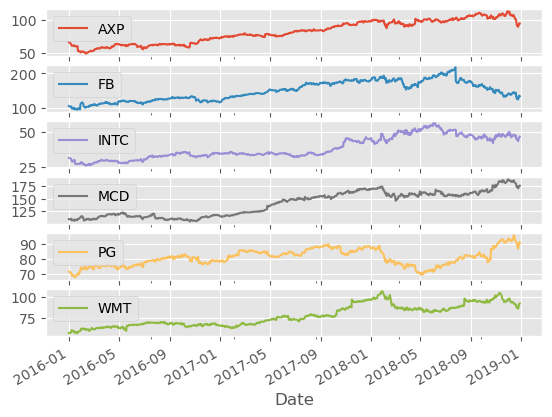

In [6]:
close.plot(subplots=True)
plt.show()

__Visualize__ the Adjusted Close of the six stocks __over time__, starting each at the __Base Value 100__!

In [8]:
close.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,65.910294,104.660004,31.437597,108.968636,71.450706,56.722713
2016-01-04,64.052849,102.220001,31.017828,108.452126,70.514938,56.870766
2016-01-05,63.067310,102.730003,30.871820,109.946350,70.739891,58.221748
2016-01-06,61.315948,102.970001,30.187403,109.208458,70.056053,58.804699
2016-01-07,60.763893,97.919998,29.055828,106.681190,69.444221,60.174198


In [13]:
close.iloc[0,:]

AXP      65.910294
FB      104.660004
INTC     31.437597
MCD     108.968636
PG       71.450706
WMT      56.722713
Name: 2015-12-31 00:00:00, dtype: float64

In [16]:
norm = close.div(close.iloc[0,:]).mul(100).round(2)
norm

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,100.00,100.00,100.00,100.00,100.00,100.00
2016-01-04,97.18,97.67,98.66,99.53,98.69,100.26
2016-01-05,95.69,98.16,98.20,100.90,99.01,102.64
2016-01-06,93.03,98.39,96.02,100.22,98.05,103.67
2016-01-07,92.19,93.56,92.42,97.90,97.19,106.08
...,...,...,...,...,...,...
2018-12-21,138.00,119.39,141.73,159.82,126.32,153.61
2018-12-24,135.24,118.54,137.78,156.27,121.31,151.30
2018-12-26,141.79,128.21,146.00,159.71,125.10,159.39


In [17]:
print(norm.head(1))
print(norm.tail(1))

              AXP     FB   INTC    MCD     PG    WMT
Date                                                
2015-12-31  100.0  100.0  100.0  100.0  100.0  100.0
               AXP      FB    INTC     MCD      PG     WMT
Date                                                      
2018-12-28  142.67  127.27  147.77  161.11  126.61  162.42


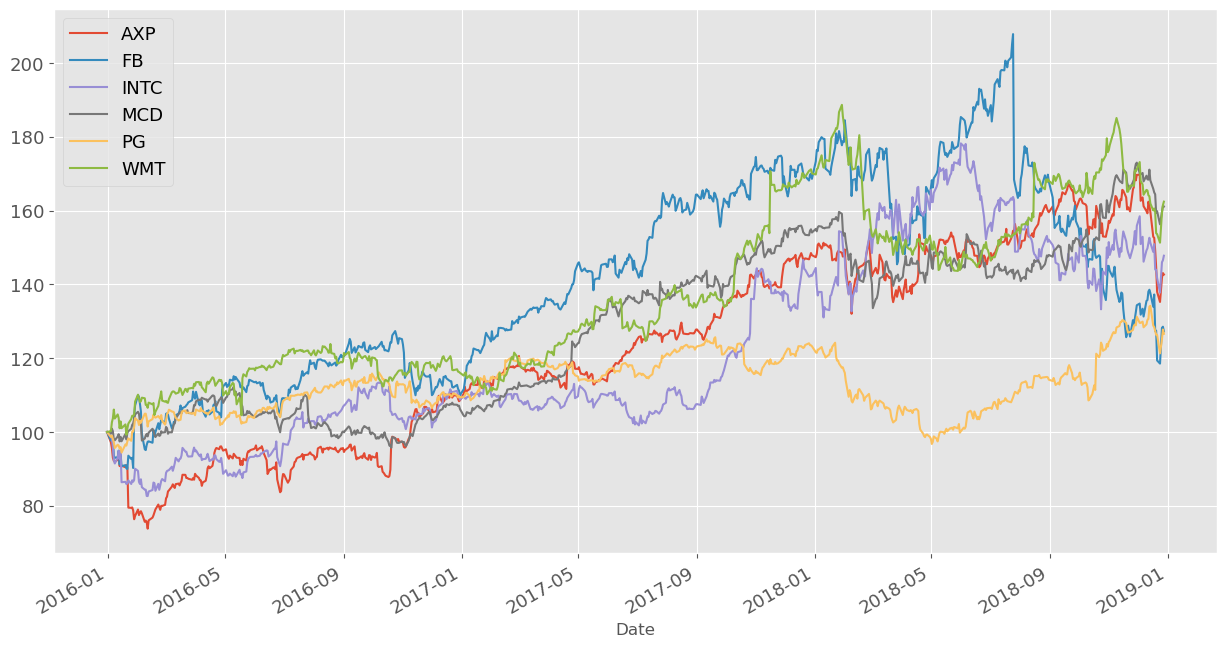

In [19]:
norm.plot(figsize=(15,8),fontsize=13)
plt.legend(fontsize=13)
plt.show()

Calculate __monthly returns__ for all six stocks and create a new __returns__ DataFrame!

In [32]:
monthly_close = norm.resample("BM").mean()

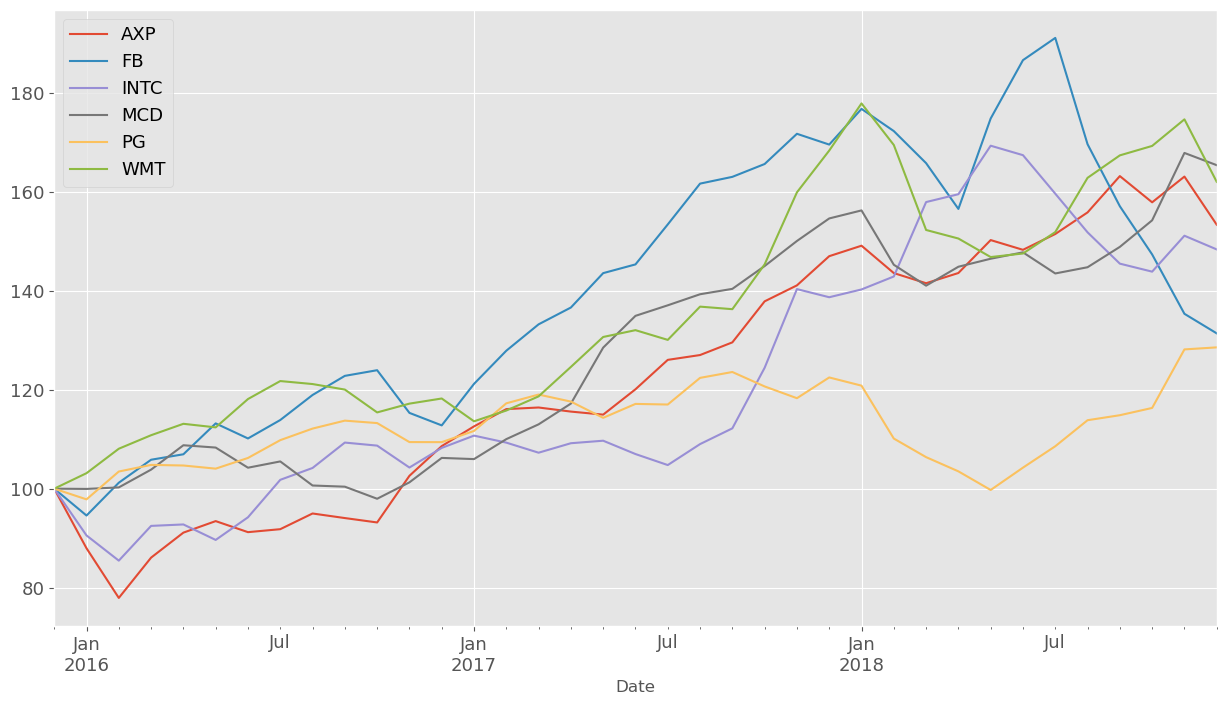

In [33]:
monthly_close.plot(figsize=(15,8),fontsize=13)
plt.legend(fontsize=13)
plt.show()

In [39]:
monthly_close.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2016-01-29,87.963158,94.575789,90.553684,99.950526,97.842105,103.132632
2016-02-29,77.931000,101.205000,85.462500,100.258000,103.464500,108.071500
2016-03-31,86.074545,105.847727,92.482273,103.848636,104.805455,110.800455
2016-04-29,91.120952,106.950000,92.774286,108.775714,104.682857,113.107143


Calculate the __annualized mean return__ and the __annualized standard deviation__ of returns for all six stocks!

In [46]:
def stock_returns(ticker,multiplier=252):
    print(f'--------------{ticker}--------------')
    company = close[ticker].copy().to_frame()
    returns = company.pct_change().dropna()
    print("DAILY RETURNS")
    print("Daily Mean Return", returns.mean()[0])
    print("Daily Mean Return", returns.mean()[0])
    print('Daily Variance Return', returns.var()[0])
    print('Standard Deviation of Daily Returns', returns.std()[0])
    print()
    print("ANNUAL RETURNS")
    print("Annual Mean Return", (returns.mean()*multiplier)[0])
    print('Daily Variance Return', (returns.var()*multiplier)[0])
    print('Standard Deviation of Daily Returns', (returns.std()*np.sqrt(multiplier))[0])
    returns.plot(kind='hist',bins=100)
    plt.show()
    

--------------AXP--------------
DAILY RETURNS
Daily Mean Return 0.0005628984962466798
Daily Mean Return 0.0005628984962466798
Daily Variance Return 0.0001806864985531751
Standard Deviation of Daily Returns 0.013441967808069439

ANNUAL RETURNS
Annual Mean Return 0.1418504210541633
Daily Variance Return 0.04553299763540012
Standard Deviation of Daily Returns 0.21338462370892644


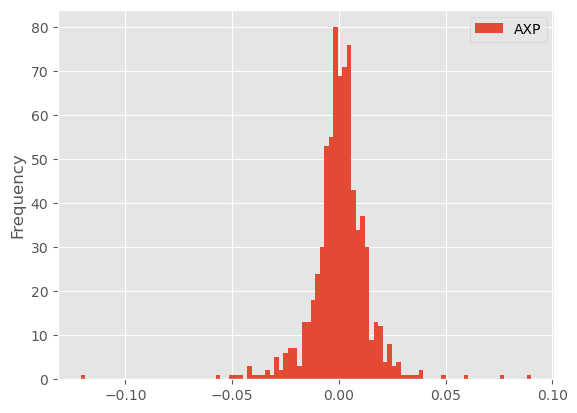

--------------FB--------------
DAILY RETURNS
Daily Mean Return 0.000490700372629961
Daily Mean Return 0.000490700372629961
Daily Variance Return 0.0003365899944968402
Standard Deviation of Daily Returns 0.01834638914055952

ANNUAL RETURNS
Annual Mean Return 0.12365649390275017
Daily Variance Return 0.08482067861320373
Standard Deviation of Daily Returns 0.2912398987316191


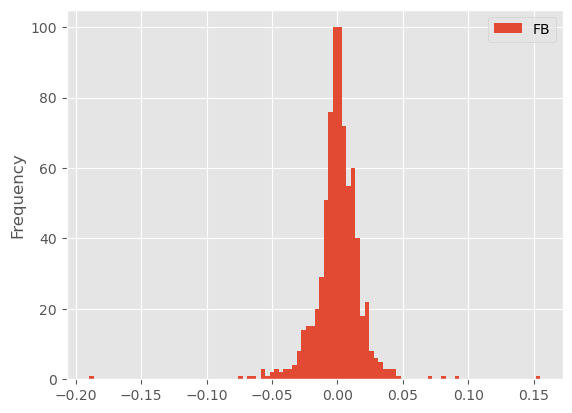

--------------INTC--------------
DAILY RETURNS
Daily Mean Return 0.0006477461254825693
Daily Mean Return 0.0006477461254825693
Daily Variance Return 0.0002580817022479213
Standard Deviation of Daily Returns 0.01606492148278109

ANNUAL RETURNS
Annual Mean Return 0.16323202362160746
Daily Variance Return 0.06503658896647617
Standard Deviation of Daily Returns 0.25502272245130664


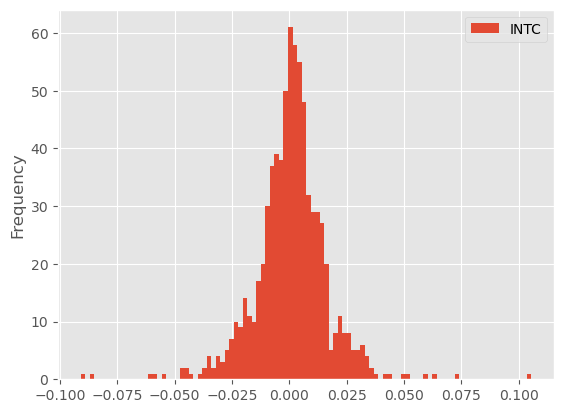

--------------MCD--------------
DAILY RETURNS
Daily Mean Return 0.0006884320661357265
Daily Mean Return 0.0006884320661357265
Daily Variance Return 0.00011013691828518095
Standard Deviation of Daily Returns 0.01049461377494098

ANNUAL RETURNS
Annual Mean Return 0.17348488066620307
Daily Variance Return 0.0277545034078656
Standard Deviation of Daily Returns 0.16659682892499966


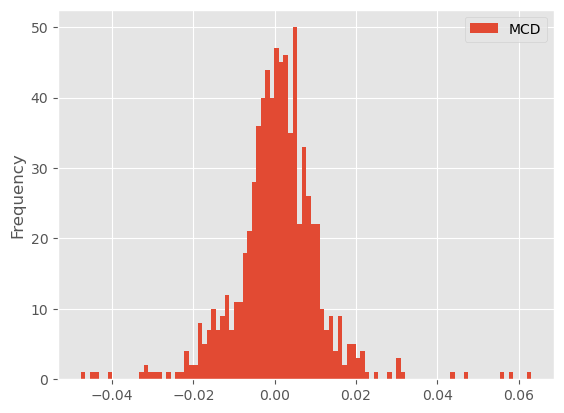

--------------PG--------------
DAILY RETURNS
Daily Mean Return 0.0003590005493791918
Daily Mean Return 0.0003590005493791918
Daily Variance Return 9.171232865200919e-05
Standard Deviation of Daily Returns 0.00957665540008667

ANNUAL RETURNS
Annual Mean Return 0.09046813844355633
Daily Variance Return 0.023111506820306316
Standard Deviation of Daily Returns 0.15202469148235861


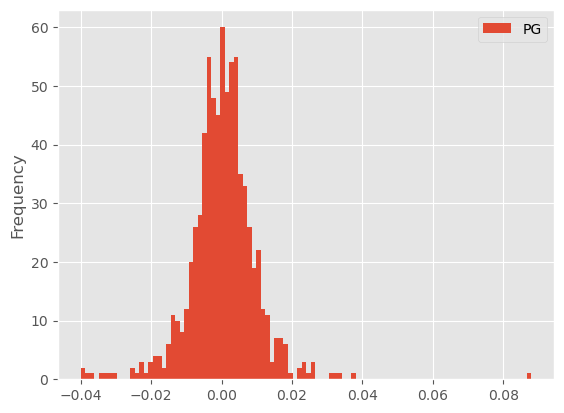

--------------WMT--------------
DAILY RETURNS
Daily Mean Return 0.0007281678321531706
Daily Mean Return 0.0007281678321531706
Daily Variance Return 0.00016910466944158547
Standard Deviation of Daily Returns 0.013004025124613744

ANNUAL RETURNS
Annual Mean Return 0.183498293702599
Daily Variance Return 0.04261437669927954
Standard Deviation of Daily Returns 0.20643249913538214


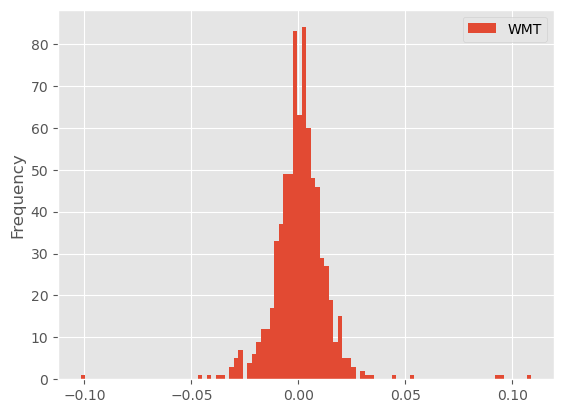

In [47]:
for i in monthly_close.columns:
    stock_returns(i)

In [49]:
ret = close.pct_change().dropna()
ret

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2016-01-04,-0.028181,-0.023314,-0.013352,-0.004740,-0.013097,0.002610
2016-01-05,-0.015386,0.004989,-0.004707,0.013778,0.003190,0.023755
2016-01-06,-0.027770,0.002336,-0.022170,-0.006711,-0.009667,0.010013
2016-01-07,-0.009003,-0.049043,-0.037485,-0.023142,-0.008733,0.023289
2016-01-08,-0.003289,-0.006025,-0.010364,-0.001556,-0.015678,-0.022913
...,...,...,...,...,...,...
2018-12-21,-0.046361,-0.063343,-0.015371,0.002706,-0.000110,-0.001719
2018-12-24,-0.020037,-0.007123,-0.027877,-0.022222,-0.039683,-0.015035
2018-12-26,0.048492,0.081573,0.059647,0.022023,0.031250,0.053484


In [51]:
ret.describe().T.loc[:,['mean','std']]

,mean,std
AXP,0.000563,0.013442
FB,0.000491,0.018346
INTC,0.000648,0.016065
MCD,0.000688,0.010495
PG,0.000359,0.009577
WMT,0.000728,0.013004


In [52]:
summary = ret.describe().T.loc[:,['mean','std']]
summary

,mean,std
AXP,0.000563,0.013442
FB,0.000491,0.018346
INTC,0.000648,0.016065
MCD,0.000688,0.010495
PG,0.000359,0.009577
WMT,0.000728,0.013004


In [53]:
summary['mean'] = summary['mean']*252
summary['std'] = summary['std']*np.sqrt(252)
summary

,mean,std
AXP,0.141850,0.213385
FB,0.123656,0.291240
INTC,0.163232,0.255023
MCD,0.173485,0.166597
PG,0.090468,0.152025
WMT,0.183498,0.206432


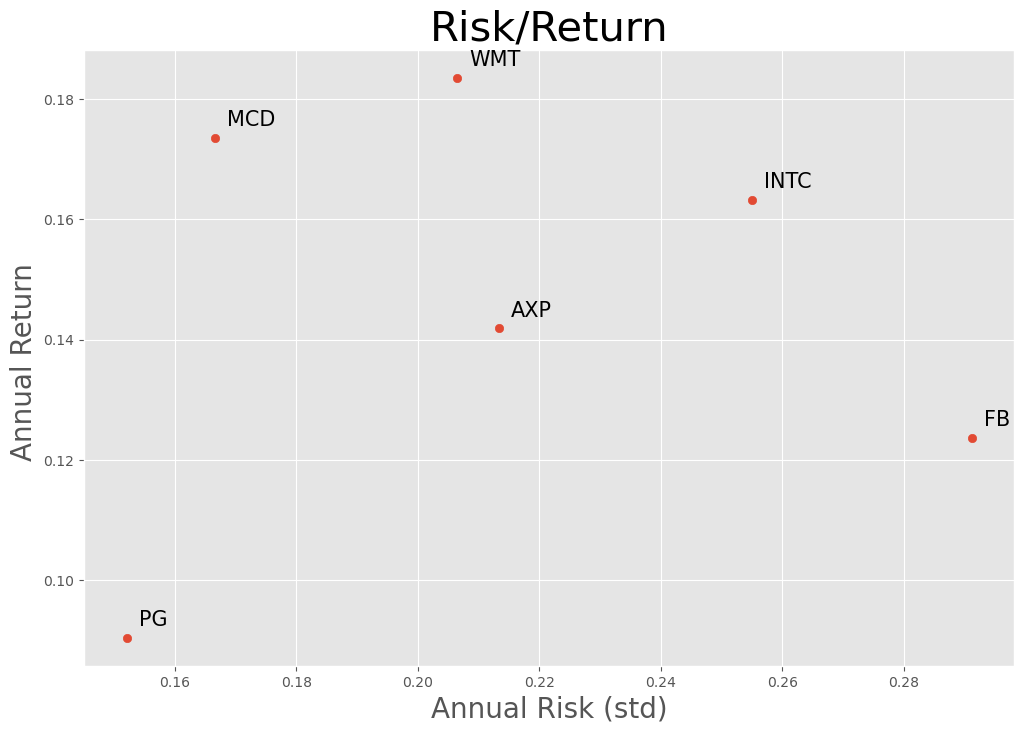

In [54]:
plt.figure(figsize=(12,8))
plt.scatter(data=summary,x='std',y='mean')
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i,'std']+0.002, summary.loc[i,'mean']+0.002), size=15)
plt.title('Risk/Return',fontsize=30)
plt.xlabel('Annual Risk (std)',fontsize=20)
plt.ylabel('Annual Return ',fontsize=20)
plt.show()

In [56]:
ret.corr()

,AXP,FB,INTC,MCD,PG,WMT
AXP,1.000000,0.253292,0.351357,0.230451,0.211986,0.199306
FB,0.253292,1.000000,0.398455,0.256039,0.135301,0.121333
INTC,0.351357,0.398455,1.000000,0.229492,0.247292,0.227302
MCD,0.230451,0.256039,0.229492,1.000000,0.301318,0.261000
PG,0.211986,0.135301,0.247292,0.301318,1.000000,0.320722
WMT,0.199306,0.121333,0.227302,0.261000,0.320722,1.000000


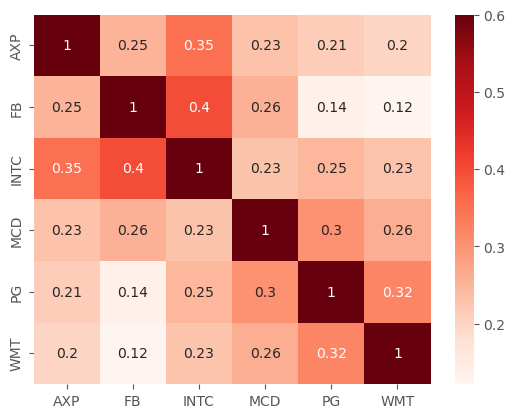

In [57]:
sns.heatmap(ret.corr(), cmap='Reds', vmax=0.6,
           annot_kws={'size':10}, annot=True)
plt.show()

In [59]:
all_days = pd.date_range(start='2015-12-31',end='2018-12-31')
all_days

DatetimeIndex(['2015-12-31', '2016-01-01', '2016-01-02', '2016-01-03',
               '2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-09',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', length=1097, freq='D')

In [62]:
close = close.reindex(all_days)

In [65]:
close.fillna(method='ffill',inplace=True)